In [1]:
import keras
from keras.models import model_from_json
import numpy as np


Using TensorFlow backend.


### Load Model

In [2]:
# load model
json_file = open('autopilot_model.json')

model_json = json_file.read()
json_file.close()

model = model_from_json(model_json)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 66, 220, 3)        12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 108, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 52, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 24, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 22, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 20, 64)         36928     
_________________________________________________________________
flat

### Load dataset

In [3]:
x_train_path = "/home/nvidia/Documents/nesvera/neural_nets/lane_following/dataset/2019_05_25_x_train.npy"
y_train_path = "/home/nvidia/Documents/nesvera/neural_nets/lane_following/dataset/2019_05_25_y_train.npy"

x_validation_path = "/home/nvidia/Documents/nesvera/neural_nets/lane_following/dataset/02019_05_25_x_validation.npy"
y_validation_path = "/home/nvidia/Documents/nesvera/neural_nets/lane_following/dataset/02019_05_25_y_validation.npy"

x_train = np.load(x_train_path)
y_train = np.load(y_train_path)

### Compile Model

In [8]:
from keras import optimizers

optimizer = optimizers.Adam(lr = 0.0001)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse', 'accuracy'])

import csv

### Train model and Save Weights

In [9]:
import datetime
import pickle
#import pandas as pd
#import csv

weight_directory = "/home/nvidia/Documents/nesvera/neural_nets/lane_following/weights"

time_start_training = datetime.datetime.now().strftime('%y_%m_%d-%H_%M')

epochs_by_save = 2
total_epochs = 10000
train_times = int(total_epochs/epochs_by_save)

batch_size = 32

total_history = 0

hist_loss = []
hist_acc = []
hist_val_loss = []
hist_val_acc = []

for i in range(train_times):
    file_path = weight_directory + "/" + time_start_training + "-" + str((i+1)*100)
    
    
    # Training
    history = model.fit(x_train,
                      y_train, 
                      validation_split = 0.2,
                      epochs = epochs_by_save, 
                      batch_size = batch_size,
                      verbose = 1)
    
    print(history)
    
    # Save
    for key, values in history.history.items():
        
        for value in values:
            if key == 'loss':
                hist_loss.append(value)

            elif key == 'acc':
                hist_acc.append(value)

            elif key == 'val_loss':
                hist_val_loss.append(value)

            elif key == 'val_acc':
                hist_val_acc.append(value)
        
    # Save plot data
    hist_path = file_path + "_hist.csv"
    '''
    df = pd.DataFrame({'loss': hist_loss,
                       'acc': hist_acc,
                       'val_loss': hist_val_loss,
                       'val_acc': hist_val_acc})
    
    '''
    with open(hist_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(hist_loss)
        writer.writerow(hist_acc)
        writer.writerow(hist_val_loss)
        
    #df.transpose().to_csv(hist_path)
    
    # Save weight
    weight_path = file_path + ".h5"
    model.save_weights(weight_path)
    

Train on 8184 samples, validate on 2047 samples
Epoch 1/2
8184/8184 [==============================] - 23s 3ms/step - loss: 3395.1800 - mean_squared_error: 3395.1800 - acc: 0.0043 - val_loss: 3328.8537 - val_mean_squared_error: 3328.8537 - val_acc: 0.0054
Epoch 2/2
8184/8184 [==============================] - 20s 2ms/step - loss: 3394.6168 - mean_squared_error: 3394.6168 - acc: 0.0038 - val_loss: 3329.6866 - val_mean_squared_error: 3329.6866 - val_acc: 0.0049
Train on 8184 samples, validate on 2047 samples
Epoch 1/2
8184/8184 [==============================] - 20s 2ms/step - loss: 3394.5122 - mean_squared_error: 3394.5122 - acc: 0.0037 - val_loss: 3329.7262 - val_mean_squared_error: 3329.7262 - val_acc: 0.0059
Epoch 2/2
8184/8184 [==============================] - 20s 2ms/step - loss: 3394.7760 - mean_squared_error: 3394.7760 - acc: 0.0038 - val_loss: 3330.6596 - val_mean_squared_error: 3330.6596 - val_acc: 0.0049
Train on 8184 samples, validate on 2047 samples
Epoch 1/2
8184/8184 [===

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128821). Check your callbacks.
  % delta_t_median)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127919). Check your callbacks.
  % delta_t_median)


8160/8184 [============================>.] - ETA: 0s - loss: 3395.1361 - mean_squared_error: 3395.1361 - acc: 0.0039

KeyboardInterrupt: 

### Plot

<IPython.core.display.Javascript object>


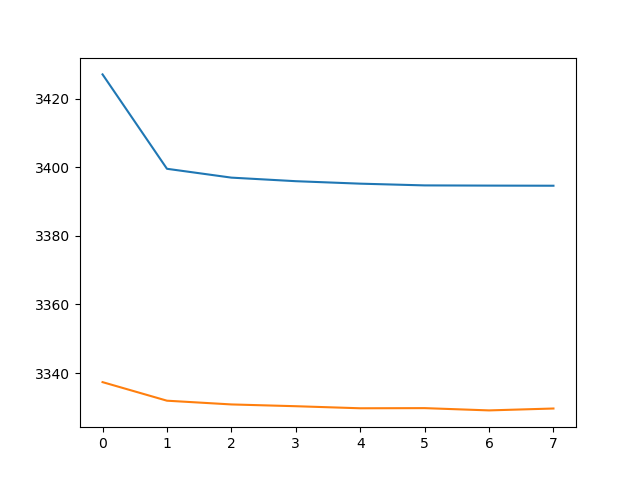

In [27]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.legend(['train', 'validation'], loc='upper left')

#lt.plot(history.history['acc'])
#lt.plot(history.history['val_acc'])

#lt.plot(history.history['mean_squared_error'])
#lt.plot(history.history['val_mean_squared_error'])


plt.show()

### Evaluate

### Save